In [22]:
import cv2 
import matplotlib.pyplot as plt
import imutils
import easyocr
import numpy as np
import time

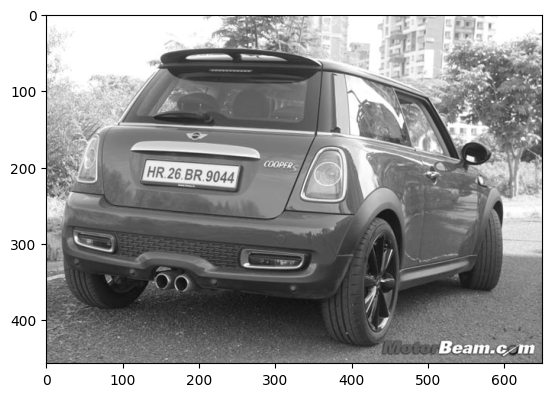

In [23]:
start_time=time.time()
img=cv2.imread('image1.jpg')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

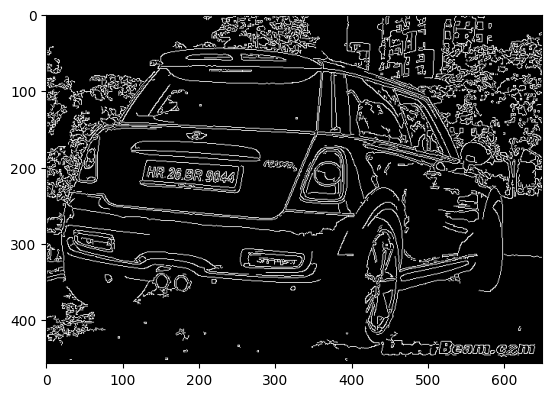

In [24]:
bfilter=cv2.bilateralFilter(gray_img,11,17,17) #Noise Reduction
edged=cv2.Canny(bfilter,30,200) #Edge Detection
plt.imshow(edged,cmap='gray')

In [25]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [26]:
location=None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx)==4:
        location=approx
        break

In [27]:
print(location)

[[[122 219]]

 [[246 227]]

 [[252 200]]

 [[132 191]]]


In [28]:
mask=np.zeros(gray_img.shape,np.uint8)
new_img=cv2.drawContours(mask,[location],0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask)

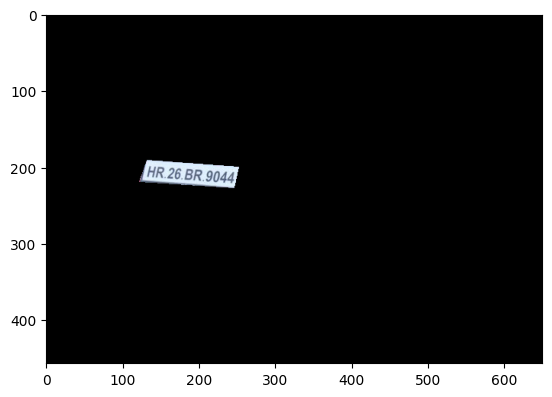

In [29]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [30]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_img=gray_img[x1:x2+1,y1:y2+1]

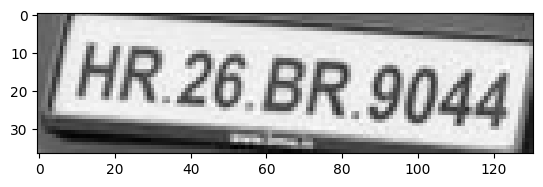

In [31]:
plt.imshow(cropped_img,cmap='gray')

In [32]:
#using easy ocr 
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_img)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

In [34]:
number_plate=result[0][-2]
number_plate

'HR.26 BR.9044'